In [1]:
from itertools import combinations, groupby

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial


from pymutspec.draw import plot_mutspec192, plot_mutspec12, sbs_orders

### Read file with calculated mutational spectrum from NeMu pipline

In [2]:
mutspecs = pd.read_csv('../../1data_derivation/dataset/MutSpecVertebrates192.csv.gz')
mutspecs = mutspecs[mutspecs.Gene == 'Cytb']
mutspecs = mutspecs.fillna(0)
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec
39552,Cytb,Mammalia,Tarsius_dentatus,A[A>C]A,0.0,0.00,0.0
39553,Cytb,Mammalia,Tarsius_dentatus,A[A>C]C,0.0,0.00,0.0
39554,Cytb,Mammalia,Tarsius_dentatus,A[A>C]G,0.0,0.00,0.0
39555,Cytb,Mammalia,Tarsius_dentatus,A[A>C]T,0.0,0.00,0.0
39556,Cytb,Mammalia,Tarsius_dentatus,C[A>C]A,0.0,11.95,0.0


In [3]:
mutspecs.Gene.value_counts()

Cytb    325824
Name: Gene, dtype: int64

In [4]:
# Function to translate mutspec from light to heavy chain
def getrevers(mut):
    translator = str.maketrans("ACGT", "TGCA")
    new_mut = mut[-1] + mut[1:-1] + mut[0]
    new_mut = new_mut.translate(translator)
    return new_mut

### Here we translate our mutspec with reverse on HEAVY CHAIN

In [5]:
mutspecs['Mut'] = mutspecs.Mut.apply(getrevers)
mutspecs["MutBase"] = mutspecs.Mut.str.slice(2, 5)
mutspecs["Context"] = mutspecs.Mut.str.get(0) + mutspecs.Mut.str.get(2) + mutspecs.Mut.str.get(-1)
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
39552,Cytb,Mammalia,Tarsius_dentatus,T[T>G]T,0.0,0.00,0.0,T>G,TTT
39553,Cytb,Mammalia,Tarsius_dentatus,G[T>G]T,0.0,0.00,0.0,T>G,GTT
39554,Cytb,Mammalia,Tarsius_dentatus,C[T>G]T,0.0,0.00,0.0,T>G,CTT
39555,Cytb,Mammalia,Tarsius_dentatus,A[T>G]T,0.0,0.00,0.0,T>G,ATT
39556,Cytb,Mammalia,Tarsius_dentatus,T[T>G]G,0.0,11.95,0.0,T>G,TTG


In [6]:
### CONTROL CHECK 
### Check that mutspec df is on heavy chain
### Most common MutBase is C>T, so it's heavy chain
mutspecs.groupby(['MutBase']).MutSpec.mean().reset_index().sort_values(by='MutSpec', ascending=False)

,MutBase,MutSpec
5,C>T,0.026464
1,A>G,0.014408
6,G>A,0.008056
10,T>C,0.006777
8,G>T,0.001540
4,C>G,0.001402
2,A>T,0.000819
3,C>A,0.000816
9,T>A,0.000688
11,T>G,0.000539


### Save table of mean Cytb mutatuional spectra for vertebrates classes

In [29]:
_cls_spectra = mutspecs.groupby(['Class', 'Mut']).MutSpec.mean().reset_index()
_cls_spectra = _cls_spectra.pivot(index='Mut', columns='Class', values='MutSpec').reset_index()
_cls_spectra['Mut'] = _cls_spectra['Mut'].astype('category')
_cls_spectra['Mut'] = _cls_spectra['Mut'].cat.set_categories(sbs_orders.ordered_sbs192_kp)
_cls_spectra = _cls_spectra.sort_values(by=['Mut']).reset_index(drop=True)
_cls_spectra.to_csv('ClassesSpectraCytb.csv', index=False, sep=';')

## Plot average Cytb mutational spectrum for all Vertebrates species

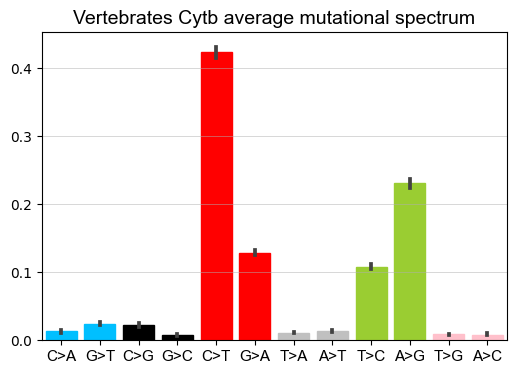

In [14]:
_species_spectra12 = mutspecs.copy()
_species_spectra12["Mut"] = _species_spectra12["Mut"].str.slice(2,5)
ax = plot_mutspec12(
    _species_spectra12.groupby(["Species", "Mut"]).MutSpec.sum().reset_index(), 
    fontname="Arial", ticksize=11, title="Vertebrates Cytb average mutational spectrum",
    savepath="MutSpec12VertCytb.pdf")

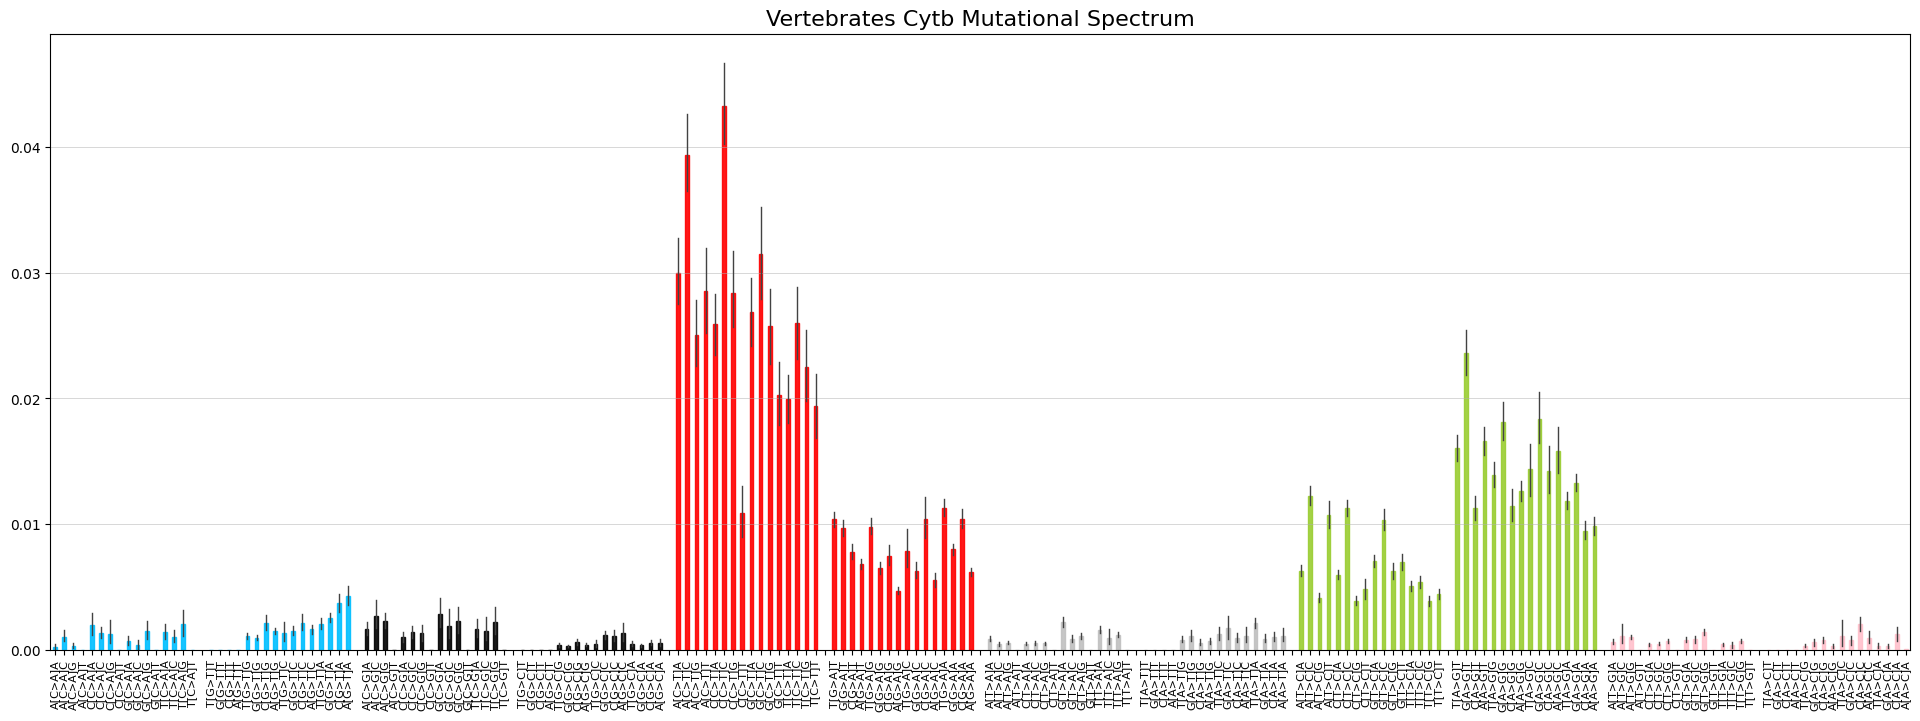

<AxesSubplot:title={'center':'Vertebrates Cytb Mutational Spectrum'}>

In [39]:
plot_mutspec192(mutspecs, title='Vertebrates Cytb Mutational Spectrum', 
                savepath='genes/MutSpec192VertCytb.pdf',
                fontname='Courier', ticksize=8, )#labels_style='long')

### Draw MutSpec for Ch>Th and Ah>Gh for all vertebrates separately 

findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.


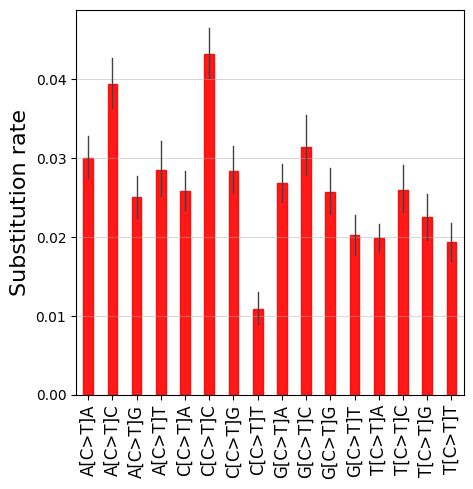

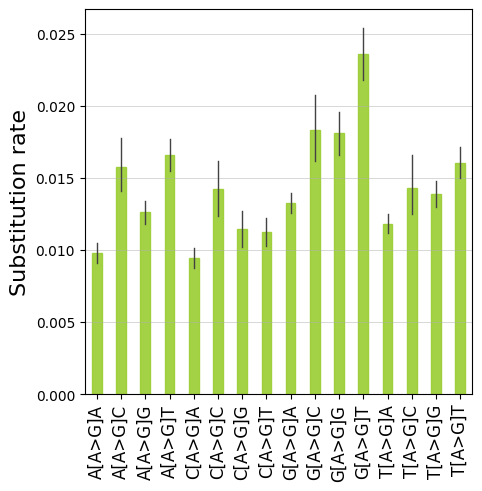

<AxesSubplot:ylabel='Substitution rate'>

In [15]:
from pymutspec.draw.sbs_orders import ordered_sbs192_kp


plot_mutspec192(mutspecs, title="", ylabel="Substitution rate",  fontname="Courier", 
                ticksize=12, sbs_order=ordered_sbs192_kp[64:64+16], figsize=(5, 5), 
                savepath="VertCytbChTh.pdf")
plot_mutspec192(mutspecs, title="", ylabel="Substitution rate", fontname="Courier", 
                ticksize=12, sbs_order=sorted(ordered_sbs192_kp[16*9:16*9+16]), figsize=(5, 5), 
                savepath="VertCytbAhGh.pdf")

### Draw Mutational Spectra for different classes

In [17]:
taxes_to_draw = ['Mammalia', 'Aves', 'Actinopteri', 'Lepidosauria', 'Amphibia']

savepath = classes/MammaliaMut192Comp.pdf


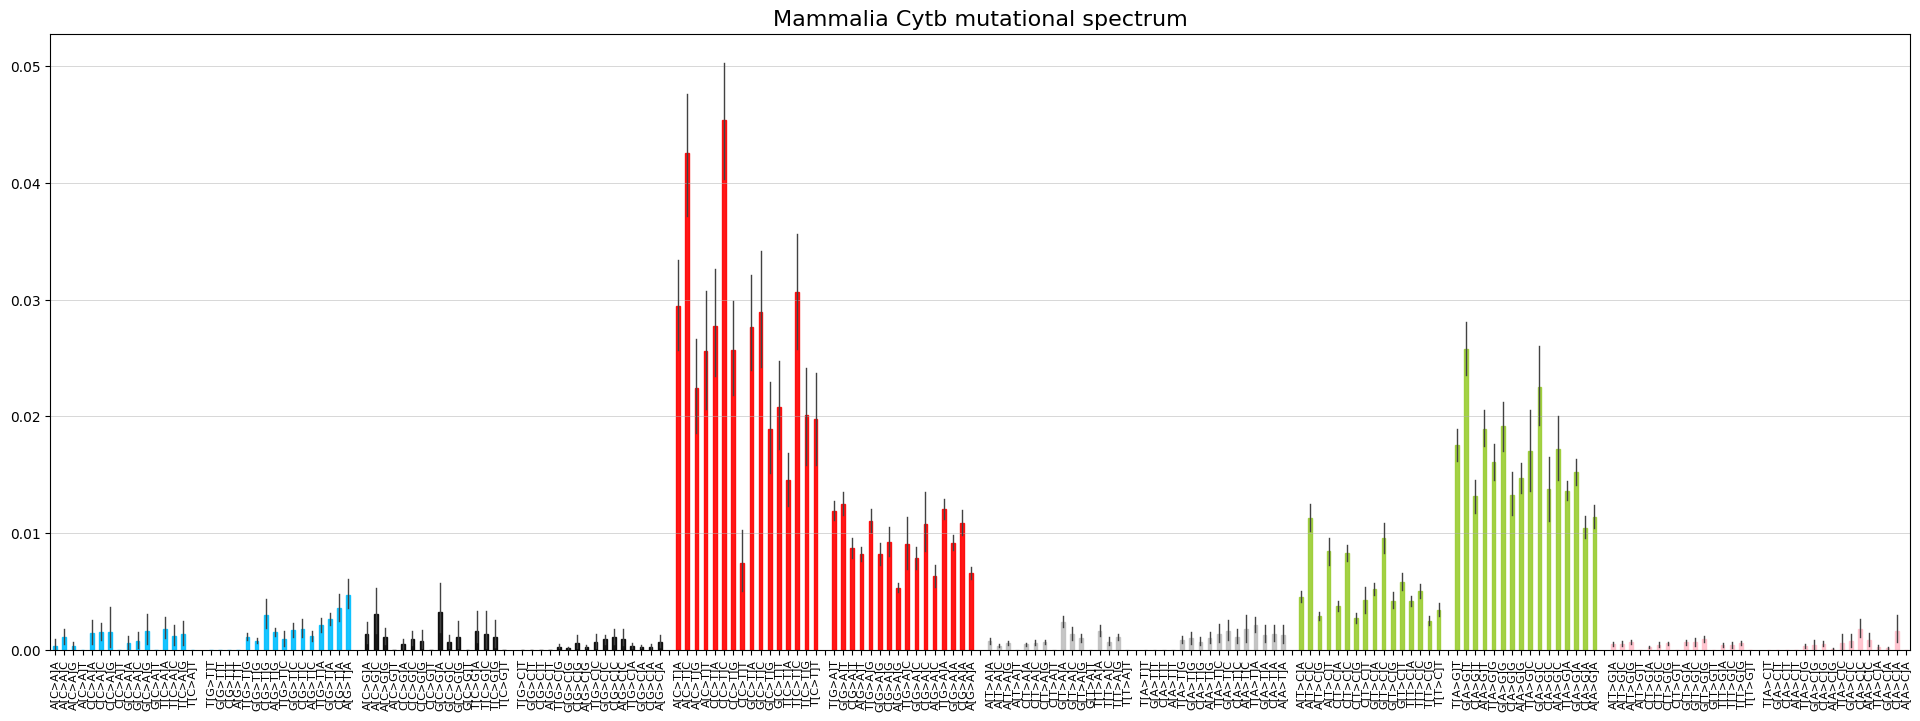

savepath = classes/AvesMut192Comp.pdf


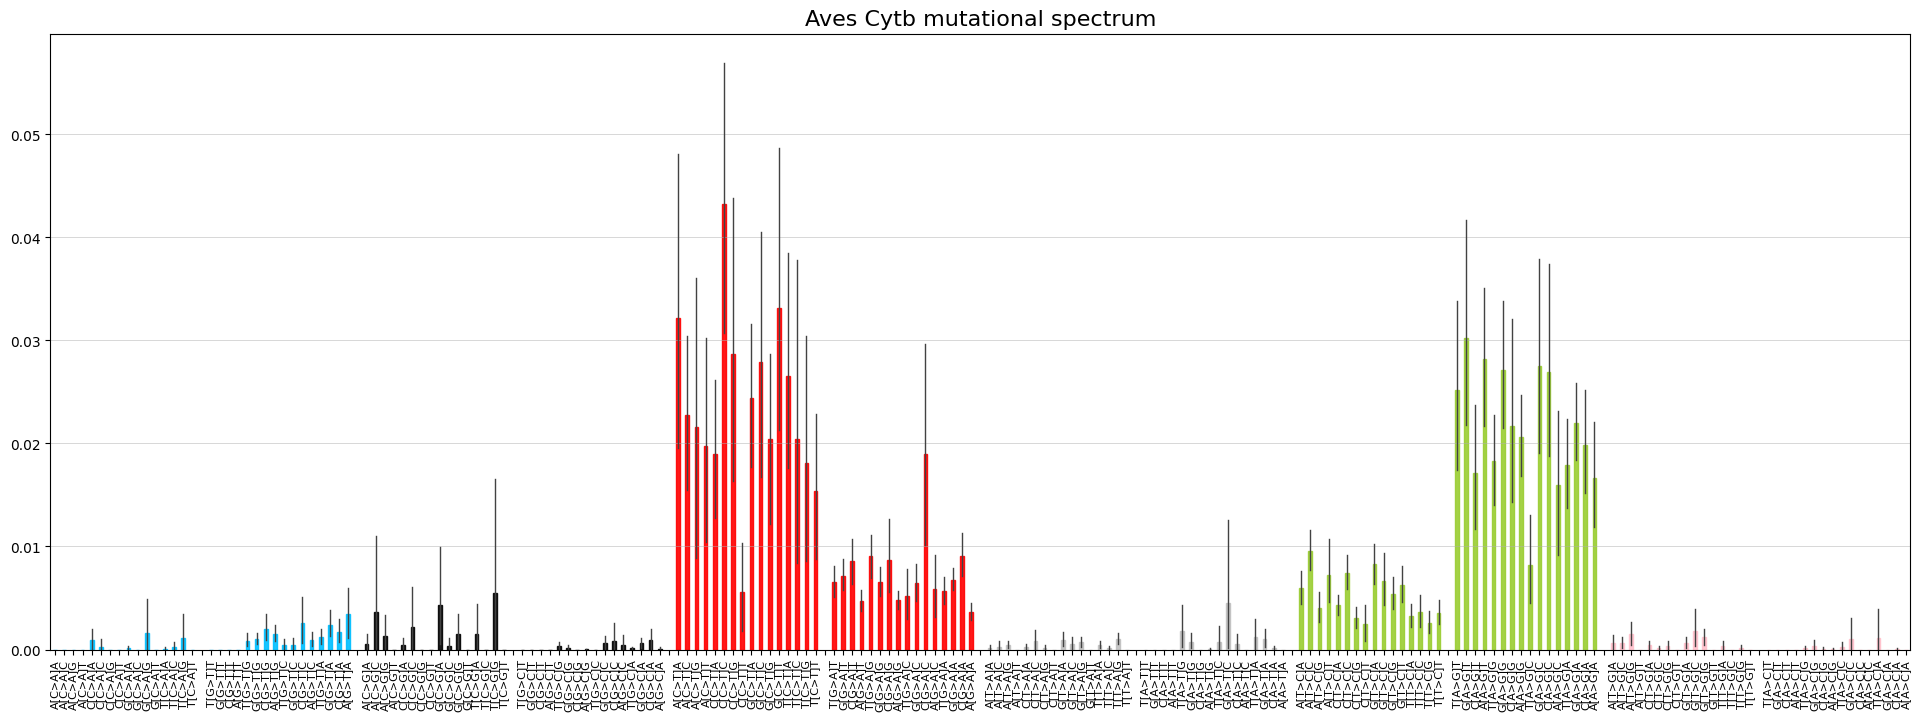

savepath = classes/ActinopteriMut192Comp.pdf


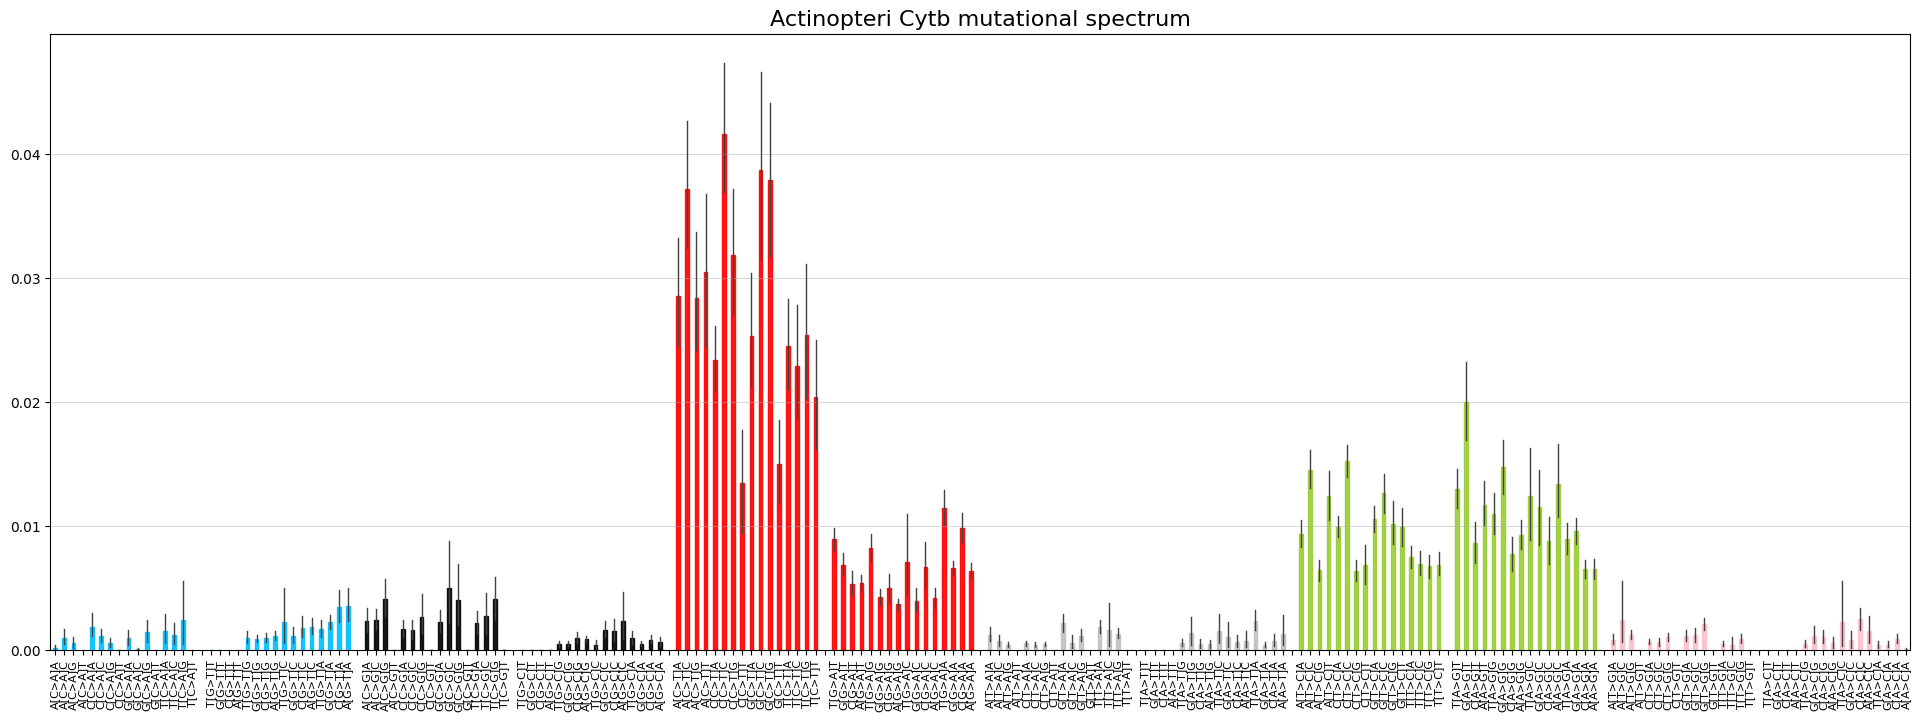

savepath = classes/LepidosauriaMut192Comp.pdf


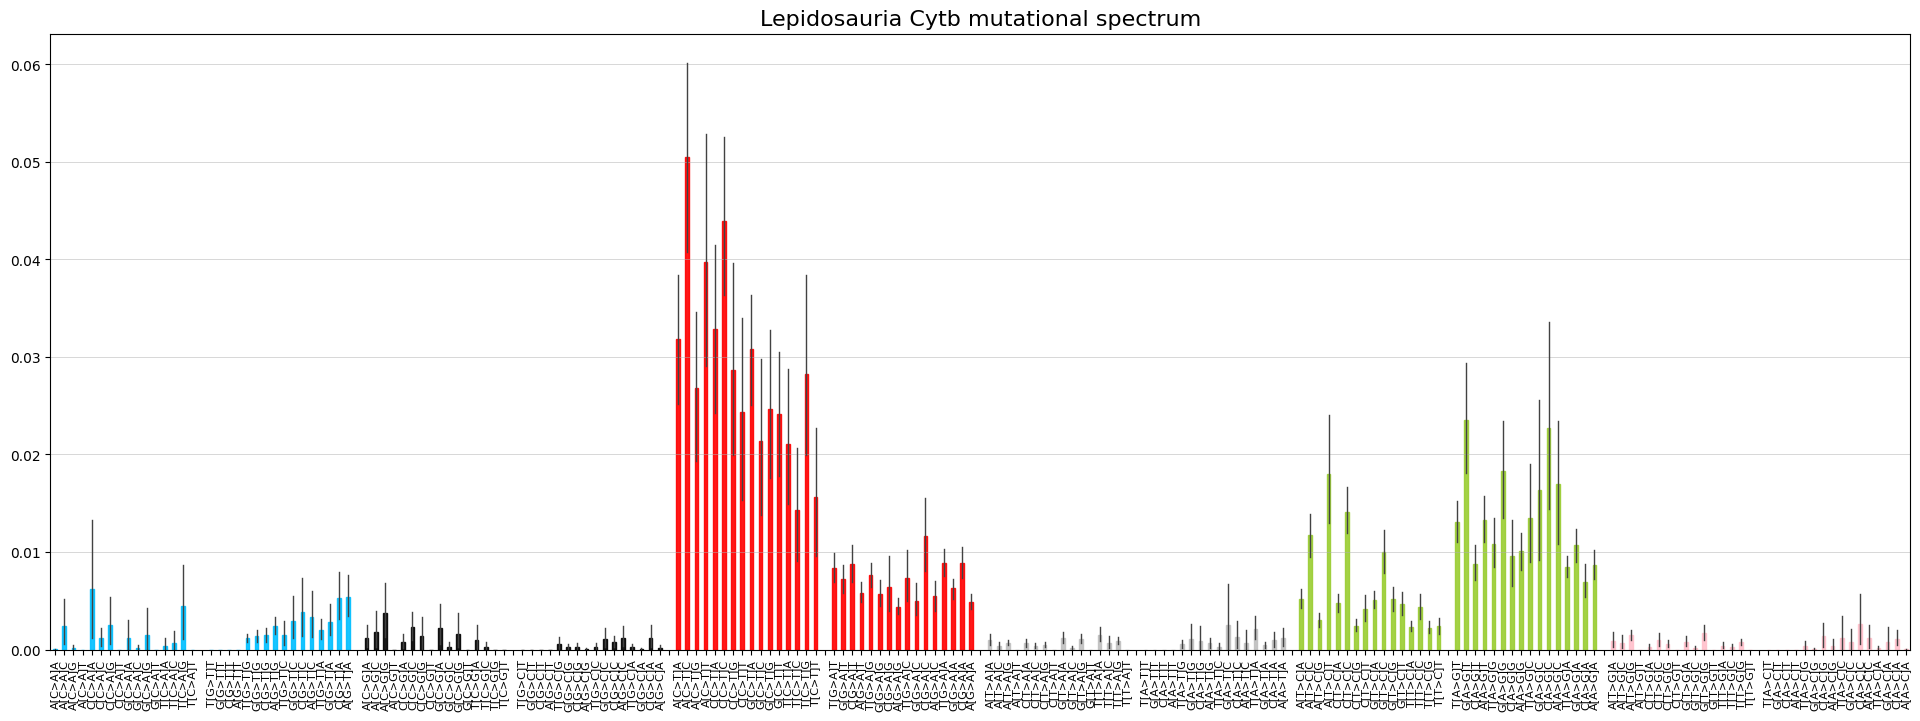

savepath = classes/AmphibiaMut192Comp.pdf


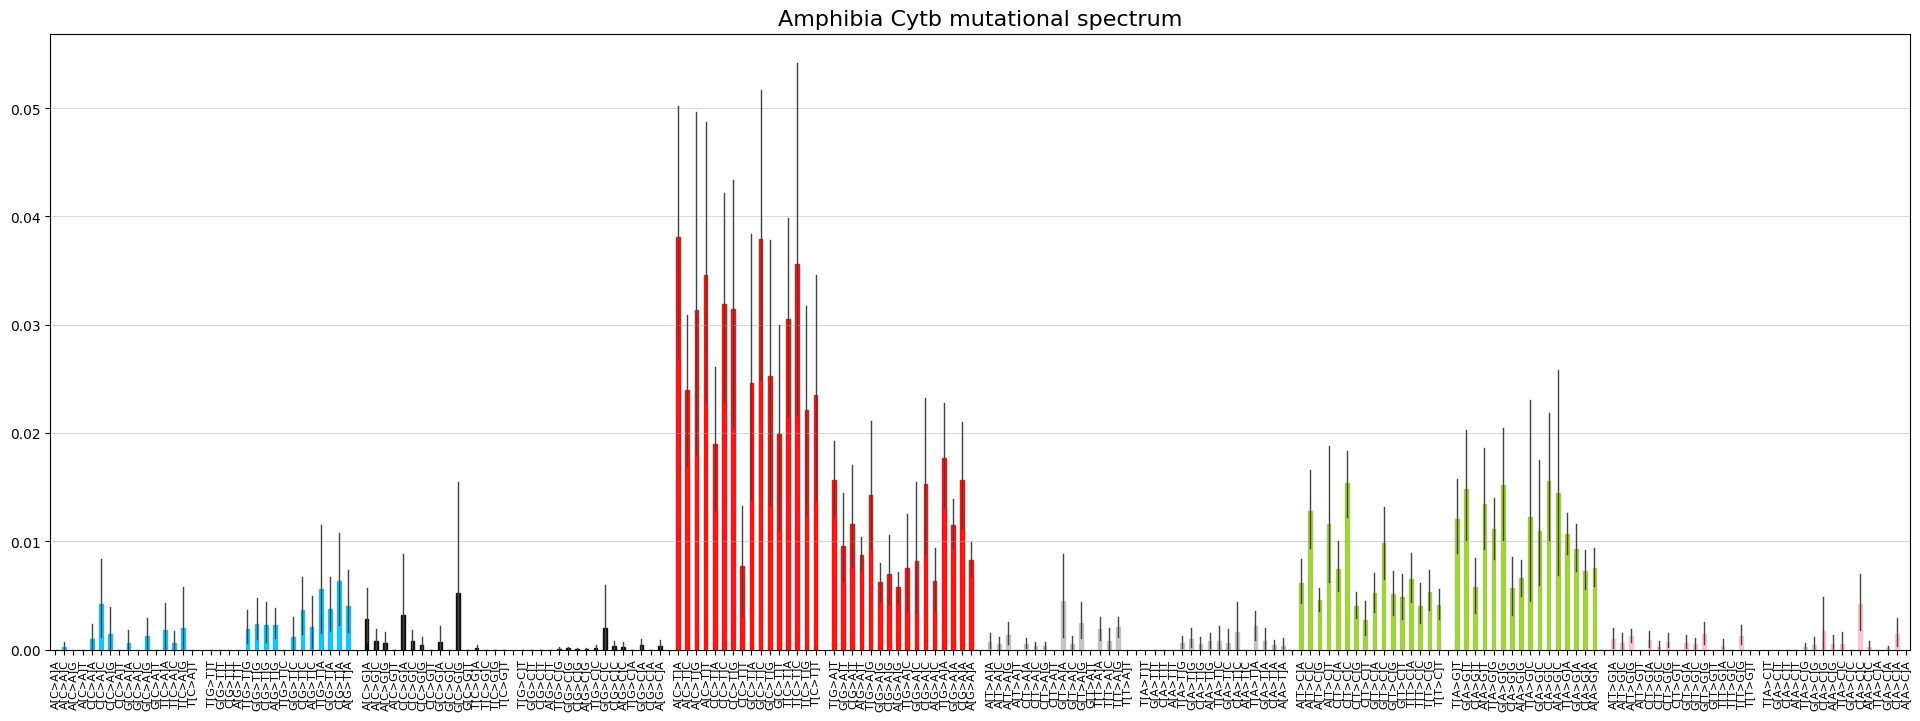

In [18]:
for tax in taxes_to_draw:
    plot_mutspec192(mutspecs[mutspecs['Class'] == tax], title=f'{tax} Cytb mutational spectrum',
    filepath=f'classes/{tax}Mut192Comp.pdf', fontname='Courier', ticksize=8, )#labels_style='long')

## Draw MutSpec for other 3 MT genes (CO1, CO3, ND2)

In [21]:
mutspecs_all = pd.read_csv('../../1data_derivation/dataset/MutSpecVertebrates192.csv.gz')
mutspecs_all = mutspecs_all.fillna(0)
mutspecs_all['Mut'] = mutspecs_all.Mut.apply(getrevers) ### TRANSLATION TO HEAVY CHAIN
mutspecs_all["MutBase"] = mutspecs_all.Mut.str.slice(2, 5)
mutspecs_all["Context"] = mutspecs_all.Mut.str.get(0) + mutspecs_all.Mut.str.get(2) + mutspecs_all.Mut.str.get(-1)
mutspecs_all = mutspecs_all[mutspecs_all.Gene != 'Cytb']
mutspecs_all.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,MutBase,Context
0,CO1,Mammalia,Crocuta_crocuta,T[T>G]T,0.0,0.000000,0.0,T>G,TTT
1,CO1,Mammalia,Crocuta_crocuta,G[T>G]T,0.0,0.000000,0.0,T>G,GTT
2,CO1,Mammalia,Crocuta_crocuta,C[T>G]T,0.0,0.000000,0.0,T>G,CTT
3,CO1,Mammalia,Crocuta_crocuta,A[T>G]T,0.0,0.000000,0.0,T>G,ATT
4,CO1,Mammalia,Crocuta_crocuta,T[T>G]G,0.0,13.666667,0.0,T>G,TTG


### Draw gene-specific 12-comp mutational spectrum for all vertebrates

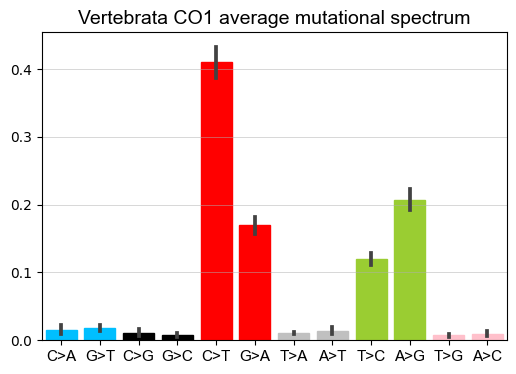

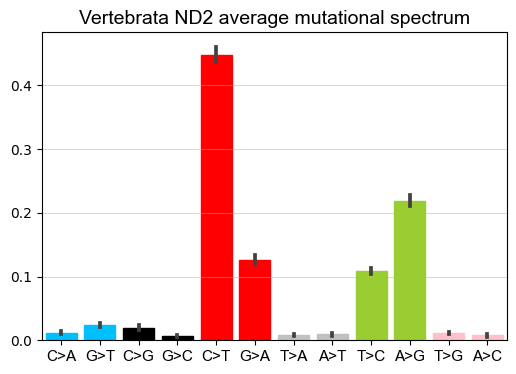

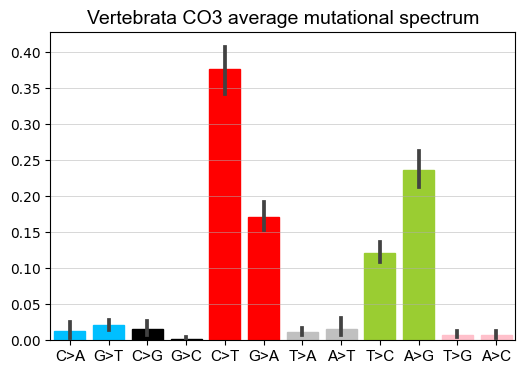

In [22]:
for gene in mutspecs_all.Gene.drop_duplicates():
    _gene_species_spectra12 = mutspecs_all[mutspecs_all.Gene == gene].copy()
    _gene_species_spectra12["Mut"] = _gene_species_spectra12["Mut"].str.slice(2,5)
    ax = plot_mutspec12(
        _gene_species_spectra12.groupby(["Species", "Mut"]).MutSpec.sum().reset_index(), 
        fontname="Arial", ticksize=11, title=f"Vertebrata {gene} average mutational spectrum")

findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.


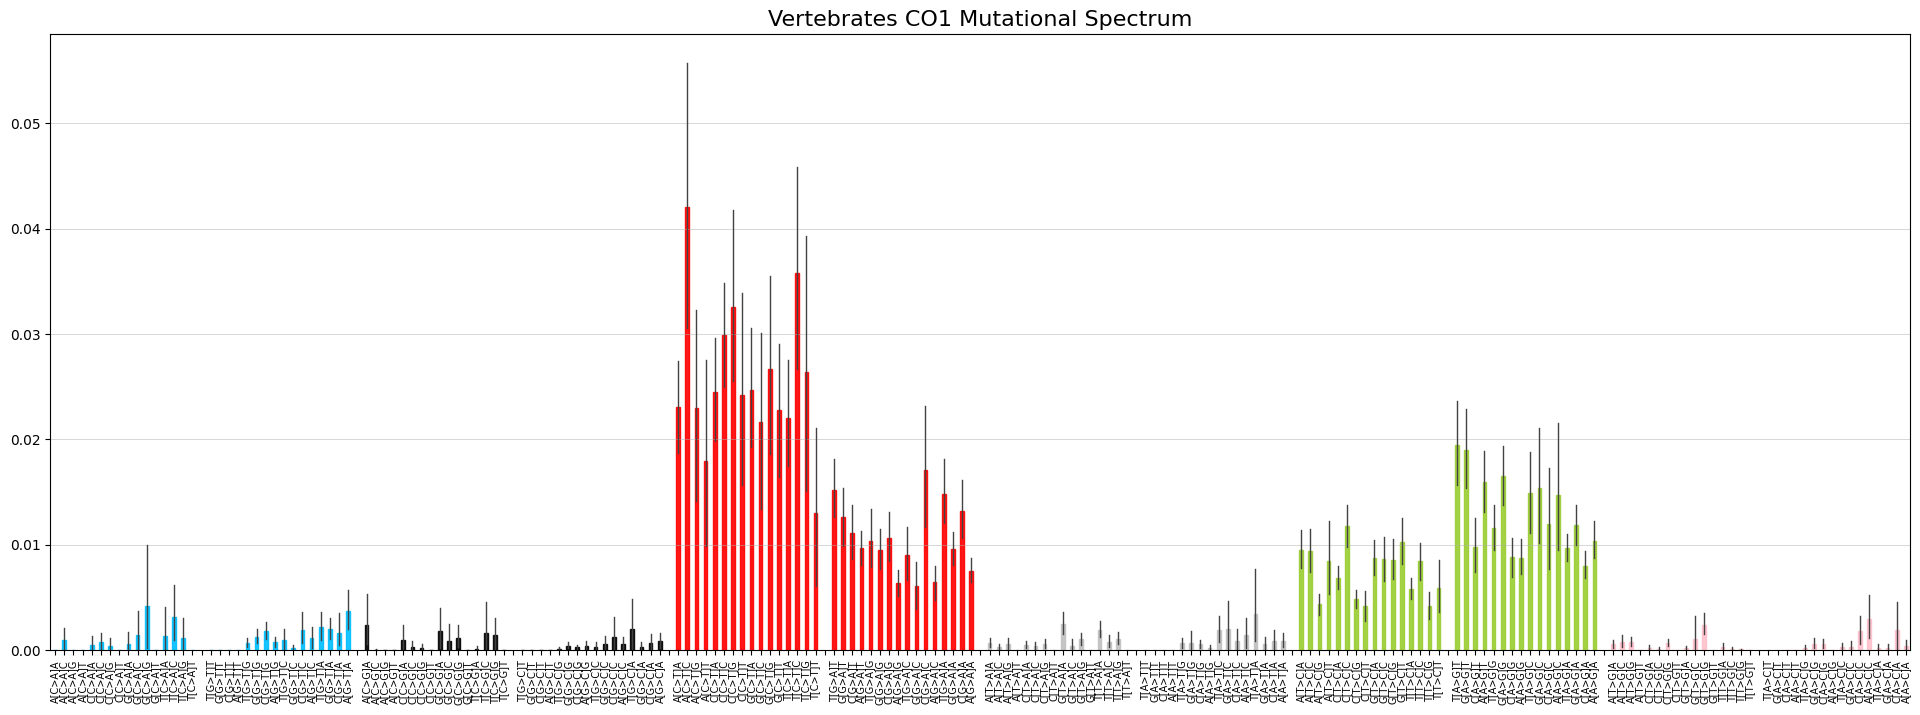

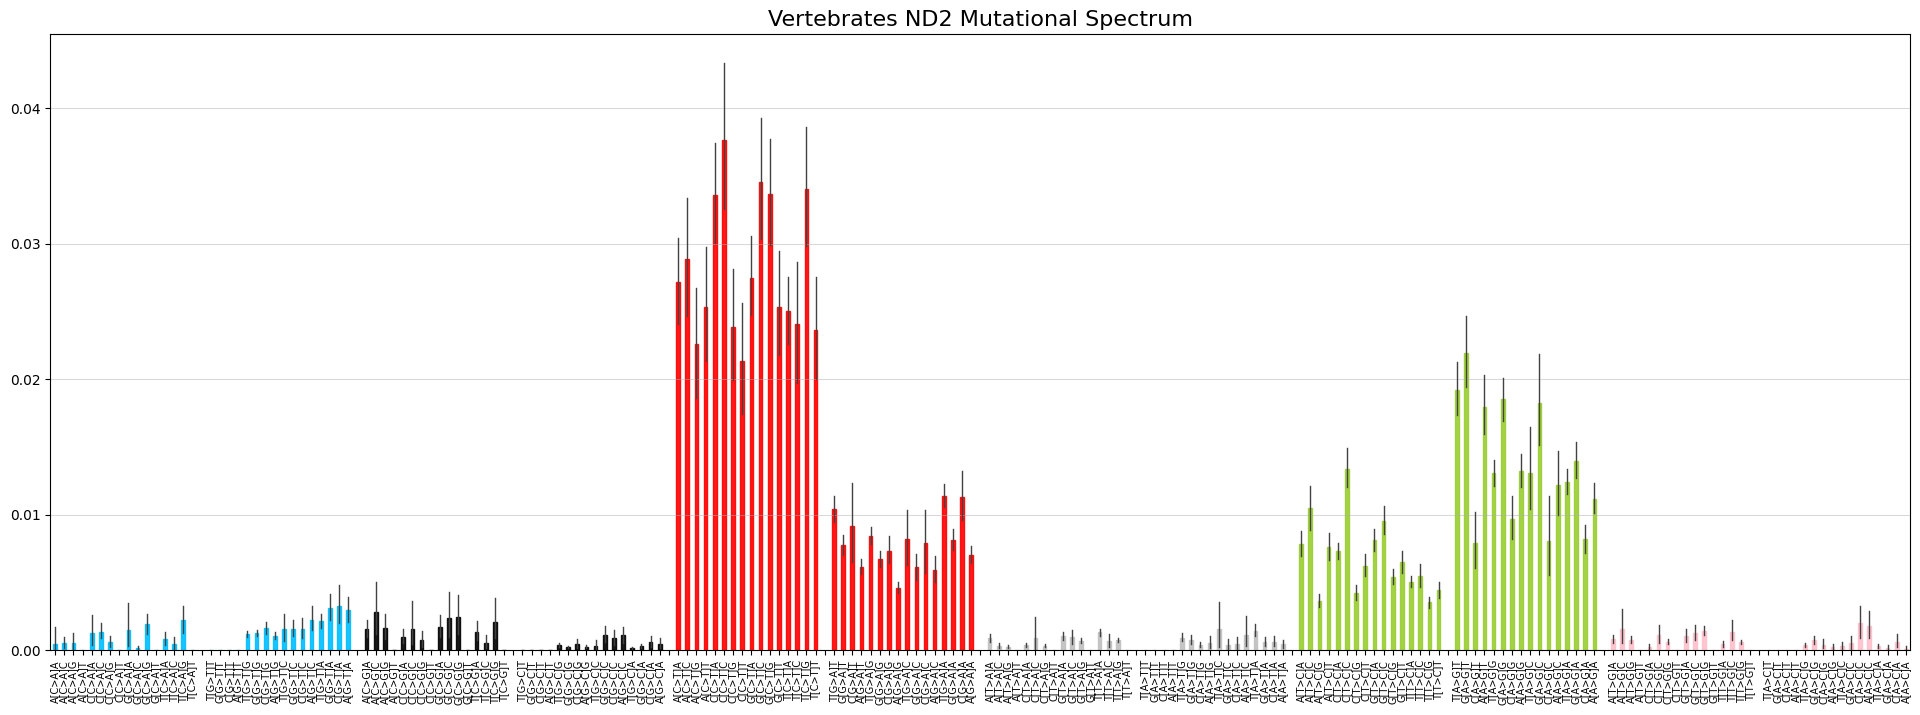

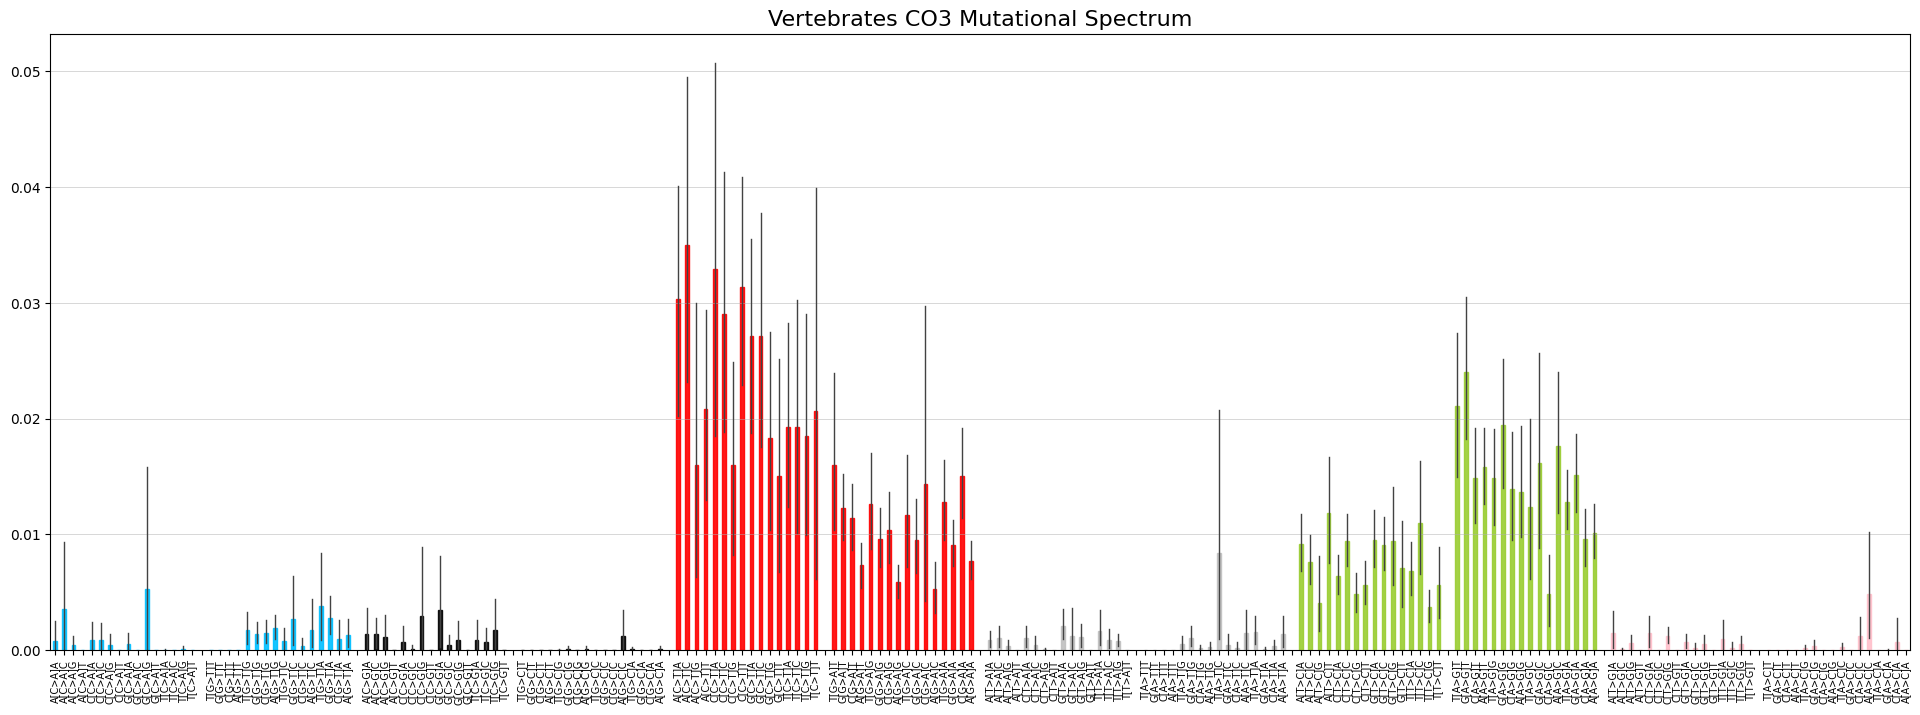

In [23]:
for gene in mutspecs_all.Gene.drop_duplicates():
    plot_mutspec192(mutspecs_all[mutspecs_all.Gene == gene], 
                    title=f'Vertebrates {gene} Mutational Spectrum', 
                    savepath=f'./genes/MutSpec192Vert{gene}.pdf',
                    fontname='Courier', ticksize=7)